# Estatística - Probabilidade e Amostragem 
## Desafio Final

Considerando a base de dados de populacao_brasileira.json responda as questões abaixo (os dados são fictícios).

Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:

* 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.
* 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?
* 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?
* 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?
* 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.
* 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?
* 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.
* 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?
* 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?
* 10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [88]:
import pandas as pd 
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import scipy.stats as stats
import math

### Leitura da base

In [89]:
df = pd.read_csv("populacao_brasileira.csv")
df.head(5)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [10]:
df.shape

(1000, 7)

### 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

In [8]:
df["nível de proficiência em inglês"].value_counts()

Avançado         344
Intermediário    329
Básico           327
Name: nível de proficiência em inglês, dtype: int64

P(A) = Probabilidade de ser fluente em inglês

In [41]:
fluentes = df.loc[df["nível de proficiência em inglês"] == "Avançado"]

In [53]:
prob_ser_fluente = fluentes["Unnamed: 0"].count()/1000

In [54]:
prob_ser_fluente

0.344

P(A') complementar = Probabilidade de não ser fluente em inglês
1 - P(A)

In [52]:
probabilidade = (1 - prob_ser_fluente) * 100
print(f"Probabilidade de não ser fluente é: {probabilidade:.2f}%")

Probabilidade de não ser fluente é: 65.60%


### 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [85]:
alagoas_para = df.loc[(df['estado'] == 'AL') | (df['estado'] == 'PA')]
alagoas_para

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
17,17,PA,19,Médio,Básico,2588.12,M
32,32,PA,33,Superior,Intermediário,3018.42,F
74,74,PA,48,Fundamental,Intermediário,3279.97,M
106,106,AL,52,Superior,Básico,2754.26,F
114,114,AL,26,Fundamental,Intermediário,2731.11,F
...,...,...,...,...,...,...,...
972,972,AL,22,Pós-graduação,Avançado,1858.31,M
976,976,AL,36,Médio,Avançado,2917.32,F
977,977,AL,37,Fundamental,Intermediário,2878.25,F
982,982,AL,18,Superior,Intermediário,4221.03,F


Probabilidade de renda ser menor que 5 mil

In [88]:
renda_menor_5 = len(alagoas_para['Unnamed: 0'].loc[df['renda'] < 5000])
renda_menor_5

75

In [ ]:
prob_menor_5 = renda_menor_5/len(alagoas_para['Unnamed: 0'])

In [ ]:
prob_menor_5

0.9493670886075949

Probabilidade de renda ser maior que 5 mil

In [89]:
prob_maior = (1 - prob_menor_5)*100
print(f"Probabilidade de ter renda maior que 5 mil é de: {prob_maior:.2f}%")

Probabilidade de ter renda maior que 5 mil é de: 5.06%


### 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
amazonas = df.loc[df['estado'] == 'AM']
amazonas['Unnamed: 0'].count()

38

In [5]:
amazonas.head(5)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
2,2,AM,32,Fundamental,Intermediário,3835.69,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
13,13,AM,57,Médio,Básico,2844.32,M
23,23,AM,38,Médio,Intermediário,5075.40,M
45,45,AM,31,Pós-graduação,Básico,5270.69,F


In [6]:
am_superior_completo = len(amazonas.loc[amazonas['escolaridade'].isin(['Superior','Pós-graduação'])])
am_superior_completo

21

Probabilidade de ter ensino superior completo no Amazonas

In [16]:
p_a = am_superior_completo/len(amazonas['Unnamed: 0'])
p_a 

0.5526315789473685

Probabilidade de não ter ensino superior completo

In [20]:
p_complementar = 1 - p_a
p_complementar

0.4473684210526315

Probabilidade da quinta pessoa ter superior completo

In [21]:
prob = ((p_complementar * p_complementar * p_complementar * p_complementar)* p_a)*100
prob

2.2135890467222827

Probabilidade de a quinta pessoa ter superior completo utilizando a distribuição geométrica

In [9]:
from scipy.stats import geom

In [18]:
# Probabilidade de sucesso em cada tentativa
p = 0.5526315789473685

# Número da tentativa desejada
n = 5

# Criando um objeto de distribuição geométrica
distribuicao = geom(p)

# Calculando a probabilidade da quinta pessoa ter ensino superior
probabilidade_quinta_pessoa = distribuicao.pmf(n)
probabilidade_quinta_pessoa = probabilidade_quinta_pessoa * 100
print(f'A probabilidade da quinta pessoa ter ensino superior é: {probabilidade_quinta_pessoa:.4f}')

A probabilidade da quinta pessoa ter ensino superior é: 2.2136


### * 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

Através dos 2 gráficos abaixo identificamos que 44.2% dos brasileiros possuem renda entre 3000 e 4500. No grafico de densidade observemos grande pico na faixa dos 3000 reais.

In [24]:
renda_0_1500 = len(df.loc[(df['renda'] > 0) & (df['renda'] < 1500)])
print(renda_0_1500 )

renda_1500_3000= len(df.loc[(df['renda'] > 1500) & (df['renda'] < 3000)])
print(renda_1500_3000)

renda_3000_4500= len(df.loc[(df['renda'] > 3000) & (df['renda'] < 4500)])
print(renda_3000_4500)

renda_4500_6000= len(df.loc[(df['renda'] > 4500) & (df['renda'] < 6000)])
print(renda_4500_6000)

55
414
442
89


In [25]:
rendas = [55,414,442,89]

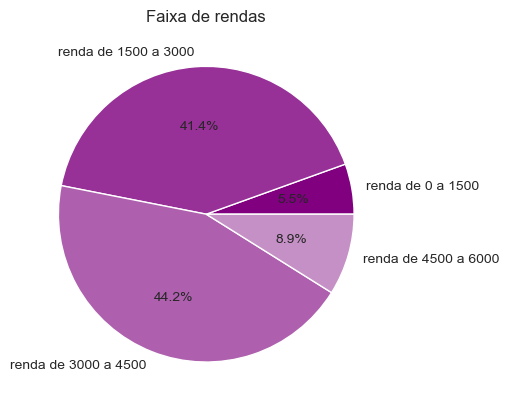

In [6]:
sns.color_palette("Set2")
sns.set_palette(sns.light_palette("purple", reverse=True))  # Tons de roxo em estilo pastel
sns.set_style("white")  # Definindo o estilo de fundo como branco
plt.pie(x= rendas, labels=['renda de 0 a 1500','renda de 1500 a 3000','renda de 3000 a 4500','renda de 4500 a 6000'], autopct='%1.1f%%')
plt.title('Faixa de rendas')
plt.show()

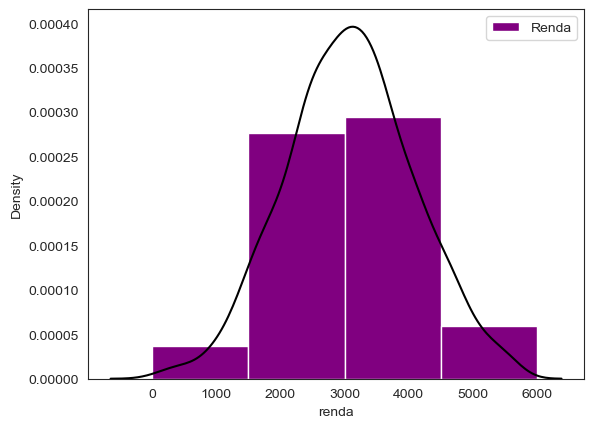

In [86]:
bin_edges = np.arange(0, df['renda'].max() + 1500, 1500)

# Criando o histograma
plt.hist(df['renda'], bins=bin_edges, color='purple', label='Renda', density=True)
sns.kdeplot(df['renda'], color='black')

plt.legend()

plt.show()

In [73]:
df['renda'].describe()

count    1000.000000
mean     3082.537180
std       996.572239
min       103.740000
25%      2425.815000
50%      3076.415000
75%      3714.487500
max      5632.380000
Name: renda, dtype: float64

### 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.


In [225]:
media = df['renda'].mean()
var = df['renda']
var = sts.variance(var)

print(f"A média amostral é: {media}")
print(f"A variância da amostra é: {var}")

A média amostral é: 3082.5371799999966
A variância da amostra é: 993156.2281676152


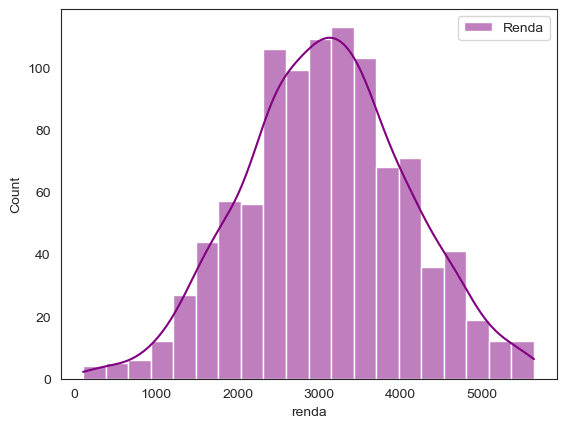

In [87]:
sns.histplot(df['renda'], bins=20, kde=True, color='purple', label='Renda')
plt.legend()
plt.show()

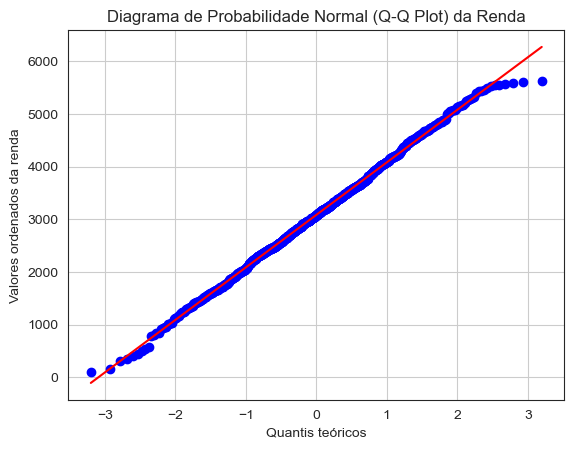

In [140]:
stats.probplot(df['renda'], dist="norm", plot=plt)
plt.title('Diagrama de Probabilidade Normal (Q-Q Plot) da Renda')
plt.xlabel('Quantis teóricos')
plt.ylabel('Valores ordenados da renda')

plt.grid(True)

### 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [90]:
amostra_pos_graduacao = df.loc[df['escolaridade'] == 'Pós-graduação']
amostra_pos_graduacao

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
11,11,SC,41,Pós-graduação,Intermediário,2396.01,M
15,15,GO,20,Pós-graduação,Básico,3254.42,M
16,16,RO,39,Pós-graduação,Básico,3337.60,M
18,18,MS,41,Pós-graduação,Avançado,2512.39,F
19,19,SP,61,Pós-graduação,Básico,2567.44,F
...,...,...,...,...,...,...,...
987,987,PA,28,Pós-graduação,Avançado,4088.75,M
988,988,SC,53,Pós-graduação,Básico,4884.59,F
992,992,DF,50,Pós-graduação,Básico,3140.89,F
994,994,DF,27,Pós-graduação,Avançado,3323.17,F


In [91]:
prob = len(amostra_pos_graduacao)/len(df['Unnamed: 0'])
prob

0.253

In [92]:
prob * 100

25.3

In [95]:
x = 243000
p = 0.243
n = 1000000

prob_1_milhao_hab = binom.pmf(x, n, p)

In [96]:
prob_1_milhao_hab 

0.0009301625042958282

In [24]:
prob_1_milhao_hab = prob_1_milhao_hab * 100
prob_1_milhao_hab

0.09301625042958282

In [25]:
print(f"A probabilidade de se encontrar {x} mil pessoas com pós-graduação em uma população de {n} é de {prob_1_milhao_hab:.2f}%")

A probabilidade de se encontrar 243000 mil pessoas com pós-graduação em uma população de 1000000 é de 0.09%


### 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [29]:
df['escolaridade'].value_counts()

Fundamental      266
Pós-graduação    253
Superior         243
Médio            238
Name: escolaridade, dtype: int64

In [30]:
df['escolaridade'].value_counts()

fundamental    = 266/1000
pos_graduacao  = 253/1000
superior       = 243/1000
medio          = 238/1000

In [31]:
lista = [fundamental, medio, superior, pos_graduacao]
lista

[0.266, 0.238, 0.243, 0.253]

In [32]:
densidade_acumulada = np.cumsum(lista)
densidade_acumulada

array([0.266, 0.504, 0.747, 1.   ])

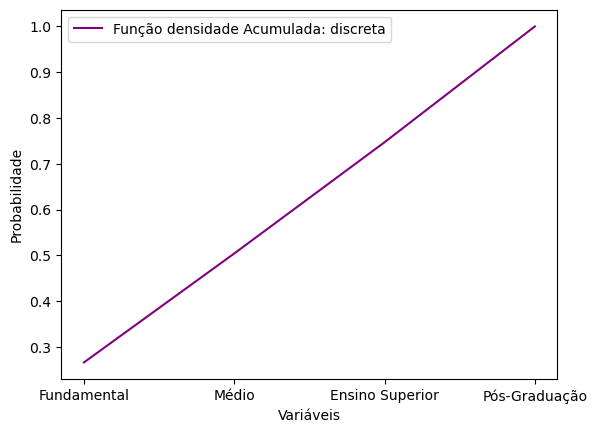

In [41]:
xticks_labels = ['Fundamental', 'Médio', 'Ensino Superior', 'Pós-Graduação']

plt.plot(densidade_acumulada, label="Função densidade Acumulada: discreta", color='purple') 
plt.xticks(range(len(xticks_labels)), xticks_labels) 
plt.xlabel('Variáveis')
plt.ylabel('Probabilidade')
plt.legend() 
plt.show()

### 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [47]:
df.head(3)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M


In [53]:
df['nível de proficiência em inglês'].value_counts()

Avançado         344
Intermediário    329
Básico           327
Name: nível de proficiência em inglês, dtype: int64

In [56]:
ing_intermediario = 329
proporcao = 329/1000
proporcao

0.329

In [58]:
formula = (proporcao*(1-proporcao)/len(df['Unnamed: 0']))
raiz_quadrada = math.sqrt(formula)
margem_erro = 1.95*raiz_quadrada
margem_erro

0.02897302361680603

In [59]:
intervalo_confianca_mais = (proporcao + margem_erro)*100
intervalo_confianca_menos = (proporcao - margem_erro)*100

In [63]:
print(f"Entre {intervalo_confianca_menos:.2f}% e {intervalo_confianca_mais:.2f}% dos entrevistados possuem inglês nível intermediário com nível de confiança de 95% e margem de erro de +-3%")

Entre 30.00% e 35.80% dos entrevistados possuem inglês nível intermediário com nível de confiança de 95% e margem de erro de +-3%


### 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [64]:
df.head(5)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [85]:
renda = df['renda'].mean() + 1000
renda

4082.5371799999966

In [93]:
superior = df[df['renda'] > renda]
print(superior.shape[0],"pessoas")
superior = len(superior['Unnamed: 0'])

161 pessoas


In [117]:
prob_renda = (superior/len(df['Unnamed: 0']))
print(f"Probabilidade de ter renda superior em mil reais em relação a média {prob_renda}%",)

Probabilidade de ter renda superior em mil reais em relação a média 0.161%


Probabilidade binomial

In [118]:
x = 60
p = 0.161
n = 1000

prob_60_pessoas = binom.pmf(x, n, p)
prob_60_pessoas = prob_60_pessoas * 100
print(f"Probabilidade de 60 pessoas terem renda superior em mil reais em relação a média {prob_60_pessoas}",)

Probabilidade de 60 pessoas terem renda superior em mil reais em relação a média 1.0995205651637739e-20


### 10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [122]:
df_sudeste = df[df['estado'].isin(['SP','MG','ES','RJ'])]
df_sudeste

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
12,12,SP,53,Médio,Intermediário,3086.59,F
19,19,SP,61,Pós-graduação,Básico,2567.44,F
22,22,SP,19,Médio,Básico,3289.77,F
39,39,SP,38,Pós-graduação,Avançado,3770.87,F
40,40,MG,26,Superior,Básico,1521.41,M
...,...,...,...,...,...,...,...
964,964,RJ,55,Médio,Básico,2181.80,F
969,969,ES,43,Pós-graduação,Básico,3955.31,M
979,979,MG,37,Médio,Intermediário,3630.81,M
985,985,ES,55,Fundamental,Intermediário,2040.56,M


In [126]:
df_sudeste_homem_escolaridade_renda = df_sudeste[(df_sudeste['sexo'] == 'M') & (df_sudeste['escolaridade'] == 'Fundamental') & (df_sudeste['renda'] > 2000)]
df_sudeste_homem_escolaridade_renda['Unnamed: 0'].count()

19

In [130]:
prob = df_sudeste_homem_escolaridade_renda['Unnamed: 0'].count()/len(df['Unnamed: 0'])
print(f"A probabilidade de alguém ser do sudeste, genero masculino, ensino fundamental com a renda maior que 2 mil é de: {prob * 100}%")

A probabilidade de alguém ser do sudeste, genero masculino, ensino fundamental com a renda maior que 2 mil é de: 1.9%
